In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
delivery=pd.read_csv('deliveries.csv')
match=pd.read_csv('matches.csv')
data=pd.read_csv('haberman.csv')

In [3]:
data.head(10)

,age,year,nodes,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


# Question 1:
Plot Histogram for all fearutes of the data set and write comments on which feature is best for predicting survival status. (Hint: Use same process as did in iris data set.)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


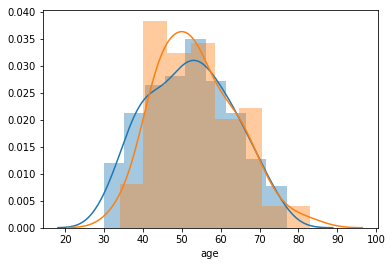

In [4]:
sns.distplot(data[data['survive']==1]['age'])
sns.distplot(data[data['survive']==2]['age'])

1.Below age 40(the first intersecting point) to age 20 the chances of people to survive below 5 years is more than the chances to survive more than 5 years, above the age 41 to age 55 the chances of people to survive more than 5 years is greater than the chances to survive below 5 years but the 35 to 75 region has the big overlapped region so the 41 to 55 will give more errors for prediction.

2.Above age 78 to age 95 the chances of people to survive more than 5 years is greater than the chances of people to survive below 5 years.

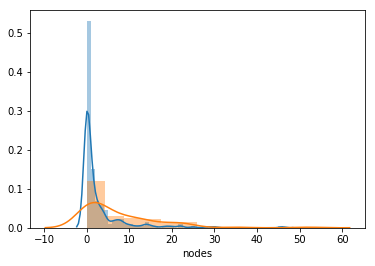

In [5]:
sns.distplot(data[data['survive']==1]['nodes'])
sns.distplot(data[data['survive']==2]['nodes'])

The column nodes has the best distinction between two survival cases for prediction from the other two columns as it has more clear cuts with less overlapping cases.

1.From the point 0 to 5(2nd intersection) the chance of people to survive below 5 years is more than the chances of people to survive more than 5 years and above the point 5 the chances of people to survive more than 5 years is greater than the chances of people to survive below 5 years.

2.From the point -2(first intersection) to -10 the chnaces of people to survie more than 5 years is greater than the people to survive below 5 years and above -2 vice-versa.

So the nodes column is the best feature for the survival prediction.

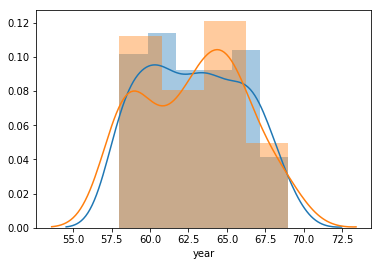

In [7]:
sns.distplot(data[data['survive']==1]['year'])
sns.distplot(data[data['survive']==2]['year'])

The year column has no difference bteween the two category of survival cases(below 5 years of surviving and more than 5 years of surviving) this is the worst case for analysis.

# uestion 2:
On the ipl wala dataset create a function which will accept a batsman name and 1 interger value and returns the number of runs he has after those many matches

E.g Input (V Kohli, 18)

Output - 678(Runs scored by Virat Kohli after 18 matches

In [8]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
def run(name,n):
    mask1=delivery['batsman']==name
    delivery1=delivery[mask1]
    new=delivery1.groupby('match_id')['batsman_runs'].sum().reset_index()
    new1=new.head(n)
    print(name,'scored',new1['batsman_runs'].sum(),'runs after',n,'matches')

In [11]:
run('V Kohli',18)

V Kohli scored 401 runs after 18 matches


# Question 3:
Write a function which will plot the match wise scores of two batsman in the form of a PDF, check this image

In [14]:
def batsmanwisegraphanalysis(name1,name2):
    mask1=delivery['batsman']==name1
    mask2=delivery['batsman']==name2
    delivery1=delivery[mask1]
    delivery2=delivery[mask2]
    newdata=delivery1.groupby('match_id')['batsman_runs'].sum().reset_index()
    newdata1=delivery2.groupby('match_id')['batsman_runs'].sum().reset_index()
    sns.distplot(newdata['batsman_runs'],axlabel="Run Scored")
    sns.distplot(newdata1['batsman_runs'],axlabel="Run Scored")

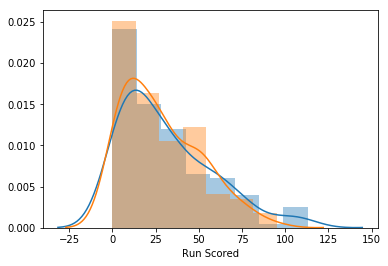

In [15]:
batsmanwisegraphanalysis('V Kohli','S Dhawan')

# Question 4:
Write a function which will take a list as input and in return plot PDF and CDF curve as like in IRIS one. (you have to write your on logic for np.cumsum()--(cummulative sum- function) )